In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer , LancasterStemmer
from nltk.corpus import stopwords
from langdetect import detect
from googletrans import Translator
from rake_nltk import Rake
import yake
import contractions
from unidecode import unidecode
from string import punctuation
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
from autocorrect import Speller
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import recall_score,precision_score,accuracy_score,confusion_matrix


In [2]:
df = pd.read_table('Restaurant_Reviews.tsv')
df

Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]

In [3]:
## detect language

def lang_detect(data):
    lang = detect(data)
    return lang

In [4]:
df['language'] = df['Review'].apply(lang_detect)

In [5]:
## Translate

def translator(data):
    trans = Translator()
    t = trans.translate(data)
    return t.text

In [6]:
translator(df['Review'][0])

'Wow... Loved this place.'

In [7]:
df['translated_text'] = df['Review'].apply(translator)

In [8]:
stop_list = stopwords.words('english')
stop_list.remove('no')
stop_list.remove('nor')
stop_list.remove('not')
def clean_data(data):
    accent = unidecode(data)
    expand_data = contractions.fix(data)
    clean_text = [word.lower() for word in word_tokenize(expand_data) if (word not in punctuation) 
                  and (word not in stop_list) and (word.isalpha() and (len(word)>2))] 
    
    return clean_text

In [9]:
clean_data(df['Review'][0])

['wow', 'loved', 'place']

In [10]:
df['clean_data'] = df['Review'].apply(clean_data)

In [11]:
contractions.fix(df['Review'][0])

'Wow... Loved this place.'

In [12]:
df

Review  Liked language  \
0                             Wow... Loved this place.      1       en   
1                                   Crust is not good.      0       en   
2            Not tasty and the texture was just nasty.      0       en   
3    Stopped by during the late May bank holiday of...      1       en   
4    The selection on the menu was great and so wer...      1       en   
..                                                 ...    ...      ...   
995  I think food should have flavor and texture an...      0       en   
996                           Appetite instantly gone.      0       en   
997  Overall I was not impressed and would not go b...      0       en   
998  The whole experience was underwhelming, and I ...      0       en   
999  Then, as if I hadn't wasted enough of my life ...      0       en   

                                       translated_text  \
0                             Wow... Loved this place.   
1                                   Crust is not good.   
2            Not tasty and the texture was just nasty.   
3    Stopped by during the late May bank holiday of...   
4    The selection on the menu was great and so wer...   
..                                                 ...   
995  I think food should have flavor and texture an...   
996                           Appetite instantly gone.   
997  Overall I was not impressed and would not go b...   
998  The whole experience was underwhelming, and I ...   
999  Then, as if I hadn't wasted enough of my life ...   

                                            clean_data  
0                                  [wow, loved, place]  
1                                   [crust, not, good]  
2                         [not, tasty, texture, nasty]  
3    [stopped, late, may, bank, holiday, rick, stev...  
4                [the, selection, menu, great, prices]  
..                                                 ...  
995            [think, food, flavor, texture, lacking]  
996                        [appetite, instantly, gone]  
997        [overall, not, impressed, would, not, back]  
998  [the, whole, experience, underwhelming, think,...  
999  [then, not, wasted, enough, life, poured, salt...  

[1000 rows x 5 columns]

In [13]:
## Ngrams

def n_grams(data,n_grams):
    grams = ngrams(data,n_grams) 
    gram_list = []
    for gram in grams:
        gram_list.append(' '.join(gram))
    return gram_list

In [14]:
n_grams(df['clean_data'][0],1)

['wow', 'loved', 'place']

In [15]:
unigram = df['clean_data'].apply(lambda x : n_grams(x,1))
unigram_list = []
for uni in unigram :
    unigram_list.extend(uni)
cnt = Counter(unigram_list).most_common(100)
cnt

[('not', 218),
 ('the', 179),
 ('food', 125),
 ('place', 106),
 ('good', 95),
 ('service', 83),
 ('great', 70),
 ('back', 61),
 ('this', 47),
 ('like', 46),
 ('time', 42),
 ('would', 41),
 ('really', 36),
 ('best', 30),
 ('ever', 28),
 ('also', 27),
 ('friendly', 27),
 ('never', 26),
 ('one', 26),
 ('restaurant', 25),
 ('nice', 25),
 ('amazing', 24),
 ('delicious', 23),
 ('vegas', 22),
 ('pretty', 20),
 ('came', 20),
 ('experience', 20),
 ('could', 19),
 ('staff', 19),
 ('get', 19),
 ('eat', 19),
 ('minutes', 19),
 ('definitely', 19),
 ('love', 19),
 ('even', 19),
 ('disappointed', 19),
 ('they', 18),
 ('bad', 18),
 ('much', 18),
 ('got', 18),
 ('going', 18),
 ('made', 17),
 ('chicken', 17),
 ('first', 17),
 ('say', 16),
 ('think', 16),
 ('better', 16),
 ('salad', 15),
 ('stars', 15),
 ('always', 15),
 ('way', 15),
 ('well', 15),
 ('very', 15),
 ('pizza', 15),
 ('menu', 14),
 ('fresh', 14),
 ('worst', 14),
 ('ordered', 14),
 ('wait', 14),
 ('steak', 14),
 ('want', 13),
 ('taste', 13),


In [16]:
## bigram

bigram = df['clean_data'].apply(lambda x : n_grams(x,2))
bigram
bigram_list = []
for bi in bigram :
    bigram_list.extend(bi)
cnt = Counter(bigram_list).most_common(100)
cnt

[('this place', 23),
 ('the food', 18),
 ('not good', 13),
 ('the service', 12),
 ('would not', 11),
 ('not back', 10),
 ('great food', 8),
 ('good food', 8),
 ('could not', 7),
 ('going back', 7),
 ('the staff', 7),
 ('food good', 7),
 ('not like', 6),
 ('great service', 6),
 ('really good', 6),
 ('first time', 6),
 ('great place', 6),
 ('not think', 6),
 ('place not', 5),
 ('food service', 5),
 ('customer service', 5),
 ('food delicious', 5),
 ('not know', 5),
 ('not impressed', 5),
 ('food great', 5),
 ('not recommend', 5),
 ('anytime soon', 5),
 ('not worth', 4),
 ('friendly staff', 4),
 ('feel like', 4),
 ('not want', 4),
 ('bad food', 4),
 ('not much', 4),
 ('not wait', 4),
 ('never ever', 4),
 ('our server', 4),
 ('waste time', 4),
 ('come back', 4),
 ('will not', 4),
 ('food not', 4),
 ('zero stars', 4),
 ('not going', 4),
 ('not disappointed', 4),
 ('service food', 4),
 ('coming back', 4),
 ('recommend place', 4),
 ('not even', 4),
 ('another minutes', 4),
 ('the chicken', 4),

In [17]:
## Trigram

trigram = df['clean_data'].apply(lambda x : n_grams(x,3))
trigram_list = []
for tri in trigram :
    trigram_list.extend(tri)
cnt = Counter(trigram_list).most_common(25)
cnt

[('not going back', 4),
 ('the food good', 4),
 ('would not recommend', 4),
 ('will never ever', 3),
 ('will not back', 3),
 ('going back anytime', 3),
 ('back anytime soon', 3),
 ('would not back', 2),
 ('this place not', 2),
 ('running around like', 2),
 ('the sweet potato', 2),
 ('the food delicious', 2),
 ('service extremely slow', 2),
 ('come back every', 2),
 ('the best place', 2),
 ('good things place', 2),
 ('give zero stars', 2),
 ('zero stars would', 2),
 ('not waste time', 2),
 ('the staff great', 2),
 ('never ever back', 2),
 ('the food terrible', 2),
 ('this place deserves', 2),
 ('first vegas buffet', 2),
 ('great place eat', 2)]

In [18]:
quadragram = df['clean_data'].apply(lambda x : n_grams(x,4))
quadragram_list = []

for quadra in quadragram:
    quadragram_list.extend(quadra)
cnt = Counter(quadragram_list).most_common(25)
cnt

[('going back anytime soon', 3),
 ('will never ever back', 2),
 ('would not recommend place', 2),
 ('great food great service', 2),
 ('not going back anytime', 2),
 ('not tasty texture nasty', 1),
 ('stopped late may bank', 1),
 ('late may bank holiday', 1),
 ('may bank holiday rick', 1),
 ('bank holiday rick steve', 1),
 ('holiday rick steve recommendation', 1),
 ('rick steve recommendation loved', 1),
 ('the selection menu great', 1),
 ('selection menu great prices', 1),
 ('now getting angry want', 1),
 ('getting angry want damn', 1),
 ('angry want damn pho', 1),
 ('honeslty not taste that', 1),
 ('not taste that fresh', 1),
 ('the potatoes like rubber', 1),
 ('potatoes like rubber could', 1),
 ('like rubber could tell', 1),
 ('rubber could tell made', 1),
 ('could tell made ahead', 1),
 ('tell made ahead time', 1)]

## WORD CLOUD

In [19]:
def word_cloud(data,column):
    string = ' '.join(data[column])+' '
    cloud = WordCloud(width = 800,height = 800,background_color = 'white',min_font_size = 10).generate(string)
    plt.figure(figsize = (8,8),facecolor = None)
    plt.imshow(cloud)
    
    plt.axis('off')
    plt.show()

In [20]:
import matplotlib.pyplot as plt


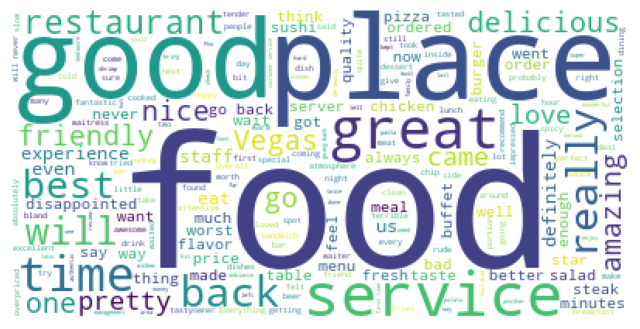

In [21]:
string = ' '.join(df['Review'])+' '
cloud = WordCloud(background_color = 'white').generate(string)
plt.figure(figsize = (8,8),facecolor = None)
plt.imshow(cloud)
    
plt.axis('off')
plt.show()

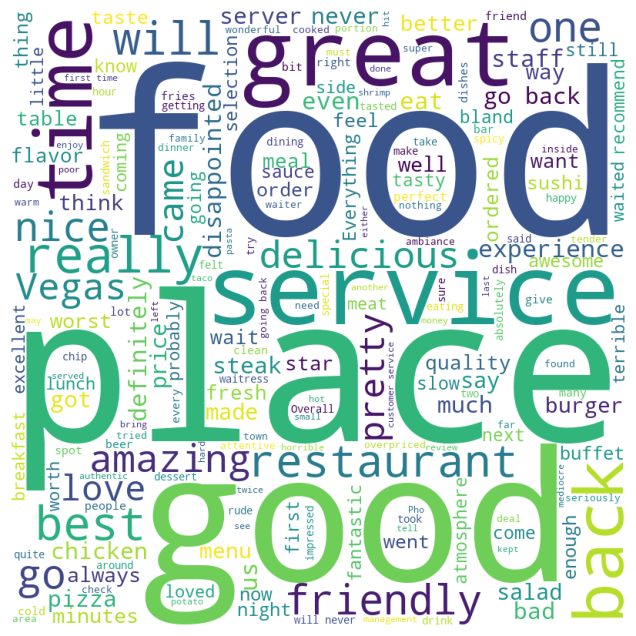

In [22]:
word_cloud(df,'Review')

## Yake Key phrase extraction

In [23]:
def yake_extractor(data):
    keyword_extractor = yake.KeywordExtractor()
    global keywords
    keywords = keyword_extractor.extract_keywords(data)
    keyword_list = []
    for kw in keywords:
        keyword_list.append(kw[0])
    return keyword_list

In [24]:
df['Review'].apply(yake_extractor)

0                  [Wow, Loved this place, Loved, place]
1                                          [Crust, good]
2                                [nasty, tasty, texture]
3      [Rick Steve recommendation, Rick Steve, holida...
4       [menu was great, prices, selection, menu, great]
                             ...                        
995    [flavor and texture, lacking, food, flavor, te...
996            [Appetite instantly, Appetite, instantly]
997                                    [back, impressed]
998    [Ninja Sushi, Sushi next time, experience was ...
999    [bring the check, poured salt, wound by drawin...
Name: Review, Length: 1000, dtype: object

In [25]:
## all keywords 
all_keywords = []
for kw in keywords :
    all_keywords.append(kw)
print(all_keywords)

[('bring the check', 0.00899321792126428), ('poured salt', 0.013527995261974615), ('wound by drawing', 0.013527995261974615), ('check', 0.0771485953923296), ('wasted', 0.1155310835876123), ('life', 0.1155310835876123), ('poured', 0.1155310835876123), ('salt', 0.1155310835876123), ('wound', 0.1155310835876123), ('drawing', 0.1155310835876123), ('time', 0.1155310835876123), ('bring', 0.1155310835876123)]


## Rake

In [26]:
def rake_extractor(data):
    keyword_extractor = Rake()
    keyword_extractor.extract_keywords_from_text(data)
    return keyword_extractor.get_ranked_phrases()

df['Review'].apply(rake_extractor)

0                                [wow ..., place, loved]
1                                          [good, crust]
2                                [texture, tasty, nasty]
3      [late may bank holiday, rick steve recommendat...
4                       [selection, prices, menu, great]
                             ...                        
995               [think food, texture, lacking, flavor]
996                            [appetite instantly gone]
997                 [go back, would, overall, impressed]
998    [ninja sushi next time, whole experience, unde...
999    [wasted enough, poured salt, wound, took, time...
Name: Review, Length: 1000, dtype: object

## Unlabelled Labelled Data

In [27]:
# preprocessing
# 1.remove spaces,newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace('\t',' ').replace('\\',' ')
    return clean_text

# 2.contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3.Handling accented characters
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4.Cleaning
stopword_list = stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
    return clean_text

# autocorrection
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

# lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data=[]
    for word in data:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return ' '.join(final_data)

In [28]:
clean_text_train = df['Review'].apply(remove_spaces)
clean_text_train = clean_text_train.apply(expand_text)
clean_text_train = clean_text_train.apply(handling_accented)
clean_text_train = clean_text_train.apply(clean_data)
#clean_text_train = clean_text_train.apply(autocorrection)
clean_text_train = clean_text_train.apply(lemmatization)

In [29]:
#clean_text_train = clean_text_train.apply(autocorrection)

## CountVectorizer

In [30]:
cnv = CountVectorizer()
bow = cnv.fit_transform(clean_text_train)
bow

<1000x1724 sparse matrix of type '<class 'numpy.int64'>'
	with 5450 stored elements in Compressed Sparse Row format>

In [31]:
cnv.get_feature_names_out()

array(['absolute', 'absolutely', 'absolutley', ..., 'yum', 'yummy',
       'zero'], dtype=object)

In [32]:
cnv_df = pd.DataFrame(bow.A,columns = cnv.get_feature_names_out())
cnv_df

absolute  absolutely  absolutley  accident  accommodation  accomodate  \
0           0           0           0         0              0           0   
1           0           0           0         0              0           0   
2           0           0           0         0              0           0   
3           0           0           0         0              0           0   
4           0           0           0         0              0           0   
..        ...         ...         ...       ...            ...         ...   
995         0           0           0         0              0           0   
996         0           0           0         0              0           0   
997         0           0           0         0              0           0   
998         0           0           0         0              0           0   
999         0           0           0         0              0           0   

     accordingly  accountant  ache  acknowledged  ...  year  yellow  \
0              0           0     0             0  ...     0       0   
1              0           0     0             0  ...     0       0   
2              0           0     0             0  ...     0       0   
3              0           0     0             0  ...     0       0   
4              0           0     0             0  ...     0       0   
..           ...         ...   ...           ...  ...   ...     ...   
995            0           0     0             0  ...     0       0   
996            0           0     0             0  ...     0       0   
997            0           0     0             0  ...     0       0   
998            0           0     0             0  ...     0       0   
999            0           0     0             0  ...     0       0   

     yellowtail  yelpers  yet  yucky  yukon  yum  yummy  zero  
0             0        0    0      0      0    0      0     0  
1             0        0    0      0      0    0      0     0  
2             0        0    0      0      0    0      0     0  
3             0        0    0      0      0    0      0     0  
4             0        0    0      0      0    0      0     0  
..          ...      ...  ...    ...    ...  ...    ...   ...  
995           0        0    0      0      0    0      0     0  
996           0        0    0      0      0    0      0     0  
997           0        0    0      0      0    0      0     0  
998           0        0    0      0      0    0      0     0  
999           0        0    0      0      0    0      0     0  

[1000 rows x 1724 columns]

In [33]:
tfidf = TfidfVectorizer()
tfidf1= tfidf.fit_transform(clean_text_train)
tfidf1

<1000x1724 sparse matrix of type '<class 'numpy.float64'>'
	with 5450 stored elements in Compressed Sparse Row format>

In [34]:
tfidf.get_feature_names_out()

array(['absolute', 'absolutely', 'absolutley', ..., 'yum', 'yummy',
       'zero'], dtype=object)

In [35]:
tfidf_df = pd.DataFrame(tfidf1.A,columns = tfidf.get_feature_names_out())
tfidf_df

absolute  absolutely  absolutley  accident  accommodation  accomodate  \
0         0.0         0.0         0.0       0.0            0.0         0.0   
1         0.0         0.0         0.0       0.0            0.0         0.0   
2         0.0         0.0         0.0       0.0            0.0         0.0   
3         0.0         0.0         0.0       0.0            0.0         0.0   
4         0.0         0.0         0.0       0.0            0.0         0.0   
..        ...         ...         ...       ...            ...         ...   
995       0.0         0.0         0.0       0.0            0.0         0.0   
996       0.0         0.0         0.0       0.0            0.0         0.0   
997       0.0         0.0         0.0       0.0            0.0         0.0   
998       0.0         0.0         0.0       0.0            0.0         0.0   
999       0.0         0.0         0.0       0.0            0.0         0.0   

     accordingly  accountant  ache  acknowledged  ...  year  yellow  \
0            0.0         0.0   0.0           0.0  ...   0.0     0.0   
1            0.0         0.0   0.0           0.0  ...   0.0     0.0   
2            0.0         0.0   0.0           0.0  ...   0.0     0.0   
3            0.0         0.0   0.0           0.0  ...   0.0     0.0   
4            0.0         0.0   0.0           0.0  ...   0.0     0.0   
..           ...         ...   ...           ...  ...   ...     ...   
995          0.0         0.0   0.0           0.0  ...   0.0     0.0   
996          0.0         0.0   0.0           0.0  ...   0.0     0.0   
997          0.0         0.0   0.0           0.0  ...   0.0     0.0   
998          0.0         0.0   0.0           0.0  ...   0.0     0.0   
999          0.0         0.0   0.0           0.0  ...   0.0     0.0   

     yellowtail  yelpers  yet  yucky  yukon  yum  yummy  zero  
0           0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
1           0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
2           0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
3           0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
4           0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
..          ...      ...  ...    ...    ...  ...    ...   ...  
995         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
996         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
997         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
998         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
999         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  

[1000 rows x 1724 columns]

## Word2Vec

In [36]:
from gensim.models import Word2Vec

In [37]:
word2vec = Word2Vec(df['clean_data'].tolist(),min_count = 2,window = 3)

In [38]:
word2vec.save('word2vec.model')

In [39]:
word2vec.vector_size

100

In [40]:
def vectorizer(list_of_docs,model):
    feature = []
    for rew in list_of_docs :
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for word in rew :
            try :
                word in model.wv 
                vectors.append(model.wv[word])

            except KeyError:
                continue
        if vectors :
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis = 0)
            feature.append(avg_vec)
        else :
            feature.append(zero_vector)
            
    return feature

In [41]:
vectorized_docs = vectorizer(df['clean_data'].tolist(),word2vec)
vectorized_docs[0]

array([-2.37287581e-03,  8.19490384e-03, -6.60173770e-04,  4.78383666e-03,
       -1.15990499e-03, -3.72176617e-03,  7.24192534e-04,  7.53723085e-03,
        2.09677988e-03, -8.30620155e-03,  4.22252761e-03, -7.80228293e-03,
       -6.06098271e-04, -3.59189115e-03,  6.69805100e-03, -6.21852139e-03,
        1.56254636e-03, -9.07841697e-03,  6.23372674e-04, -3.16264923e-03,
        2.96536088e-03,  4.72467719e-03,  5.33682341e-03,  4.20219032e-03,
       -6.72871247e-05, -7.05515791e-04,  1.73504872e-03,  4.79644584e-03,
       -1.40087854e-03, -1.44932326e-03,  8.97018836e-05, -3.90019151e-03,
        3.35337152e-03, -1.10918039e-03, -4.58864542e-03,  9.03950073e-04,
        7.41352746e-03, -4.85680578e-03, -8.54490965e-04,  3.52789857e-03,
        1.99424499e-03, -2.46403343e-03,  4.51822579e-03, -3.31386644e-03,
        7.99135212e-03,  3.13130883e-03,  3.99368466e-04, -6.72911247e-03,
        3.26774386e-03,  3.69075598e-04,  5.91093069e-03, -2.09900481e-03,
       -2.68872897e-03, -

In [42]:
type(vectorized_docs)

list

In [43]:
x_emb = np.array(vectorized_docs)
x_emb

array([[-2.37287581e-03,  8.19490384e-03, -6.60173770e-04, ...,
        -6.28861552e-03, -7.49493425e-04, -6.24299748e-03],
       [-3.79106030e-03,  6.44398620e-03,  1.34320278e-03, ...,
        -3.97995021e-03,  1.48074829e-03,  2.92039034e-03],
       [-3.41539248e-03,  2.44744890e-03,  4.51579876e-03, ...,
        -5.23762871e-03,  2.54283054e-03,  4.90359357e-03],
       ...,
       [ 1.82538026e-03,  4.05718060e-03,  4.95808246e-03, ...,
        -6.80448115e-03,  3.06524523e-03,  9.50437970e-05],
       [-1.71715324e-03,  4.40580770e-03,  4.41188086e-03, ...,
        -5.63739706e-03, -9.50686925e-04, -3.16049671e-03],
       [-2.24826694e-03,  2.23278580e-03,  1.56848819e-03, ...,
        -6.09932188e-03,  1.89687766e-03, -1.29012309e-03]])

## Build Kmeans

In [44]:
from sklearn.cluster import KMeans

In [45]:
def kmeans_build(cluster,data):
    km = KMeans(n_clusters = cluster)
    y_pred = km.fit_predict(data)
    return km,y_pred

In [46]:
## Word2Vec Clusters
model,w2v_cluster = kmeans_build(2,x_emb)
w2v_cluster

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,

In [47]:
from sklearn.cluster import KMeans

In [48]:
## Countvectorizer

model2,bow_cluster = kmeans_build(2,bow)

In [49]:
## tfidf model clusters

model3,tfidf_cluster = kmeans_build(2,tfidf1)

In [50]:
df['clean_data_text'] = df['clean_data'].apply(lambda x : ' '.join(x))

In [51]:
df['clean_data_text']

0                                        wow loved place
1                                         crust not good
2                                not tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                        the selection menu great prices
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997                 overall not impressed would not back
998    the whole experience underwhelming think ninja...
999    then not wasted enough life poured salt wound ...
Name: clean_data_text, Length: 1000, dtype: object

## Silhoutte score

In [52]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score 

In [53]:
print(f"Cluster of Word2Vec = {silhouette_score(vectorized_docs,w2v_cluster)}")
print(f"Cluster of countvectorizer = {silhouette_score(bow,bow_cluster)}")
print(f"Cluster of Word2Vec = {silhouette_score(tfidf1,tfidf_cluster)}")

Cluster of Word2Vec = 0.09253566883948448
Cluster of countvectorizer = 0.06123620514480212
Cluster of Word2Vec = 0.008071267283086684


## silhouette_visualizer

In [54]:
def visualizer(model,data):
    visualize =SilhouetteVisualizer(model,colors='yellowbrick')
    visualize.fit(data)
    visualize.show()

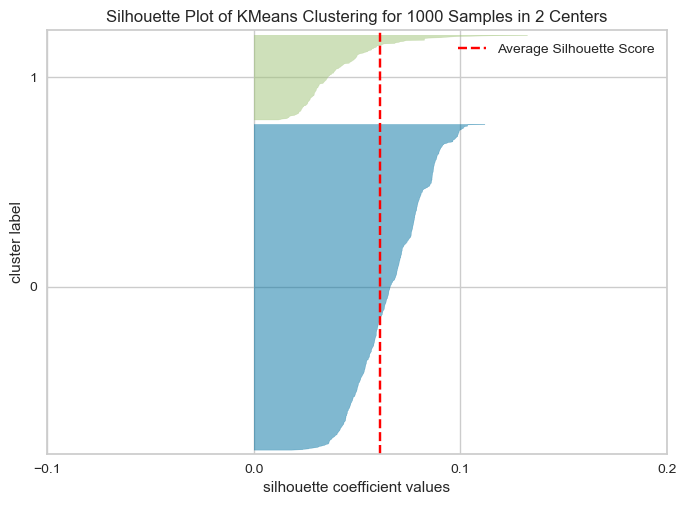

In [55]:
## bow
visualizer(model2,bow)

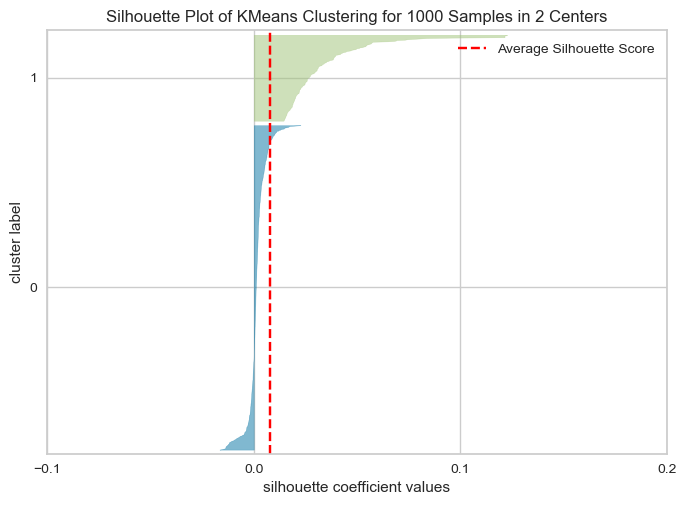

In [56]:
## tfidf

visualizer(model3,tfidf_df)

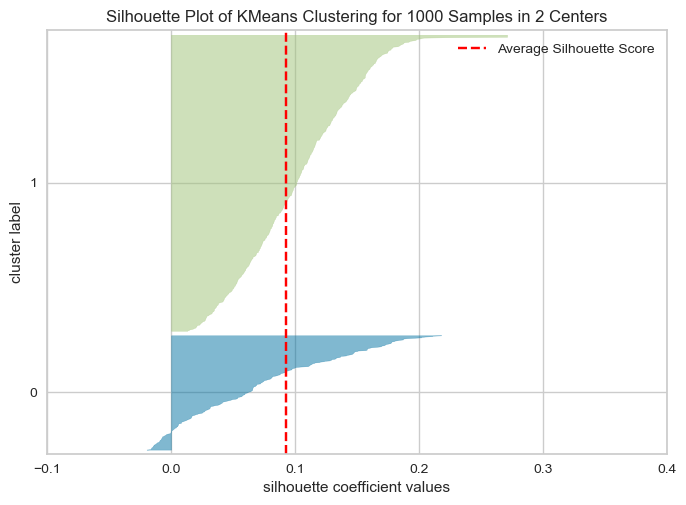

In [57]:
## Word2Vec

visualizer(model,x_emb)

In [58]:
np.array(vectorized_docs).tolist()

[[-0.0023728758096694946,
  0.00819490384310484,
  -0.0006601737695746124,
  0.004783836659044027,
  -0.0011599049903452396,
  -0.003721766173839569,
  0.0007241925341077149,
  0.007537230849266052,
  0.002096779877319932,
  -0.008306201547384262,
  0.004222527612000704,
  -0.007802282925695181,
  -0.000606098270509392,
  -0.0035918911453336477,
  0.006698051001876593,
  -0.006218521390110254,
  0.0015625463565811515,
  -0.009078416973352432,
  0.0006233726744540036,
  -0.0031626492273062468,
  0.0029653608798980713,
  0.004724677186459303,
  0.005336823407560587,
  0.004202190320938826,
  -6.728712469339371e-05,
  -0.0007055157911963761,
  0.0017350487178191543,
  0.004796445835381746,
  -0.0014008785365149379,
  -0.001449323259294033,
  8.970188355306163e-05,
  -0.0039001915138214827,
  0.0033533715177327394,
  -0.0011091803899034858,
  -0.004588645417243242,
  0.000903950072824955,
  0.007413527462631464,
  -0.00485680578276515,
  -0.0008544909651391208,
  0.0035278985742479563,
  0

In [59]:
x = pd.DataFrame(np.array(vectorized_docs).tolist())

In [60]:
y = w2v_cluster


## TrainTestSplit

In [61]:
from sklearn.naive_bayes import BernoulliNB

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify = y,test_size = 0.3,random_state = 15 )
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 100), (300, 100), (700,), (300,))

In [63]:
pd.Series(y).value_counts()

1    721
0    279
dtype: int64

## BernaulliNB

In [64]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [65]:
def model_eval(x,y,model):
    y_pred = model.predict(x)
    cm = confusion_matrix(y,y_pred)
    print(F"confusion matrix = \n{cm}")
    print('*'*30)
    
    acc = accuracy_score(y,y_pred)
    print(f"Accuracy Score = {acc}")
    print('*'*30)
    
    recall = recall_score(y,y_pred,average='micro')
    print(F"Recall Score = {recall}")
    print('*'*30)
    
    precision = precision_score(y,y_pred,average='weighted')
    print(f"Precision Score = {precision}")
    return

In [66]:
## Training

model_eval(x_train,y_train,bnb)

confusion matrix = 
[[164  31]
 [ 80 425]]
******************************
Accuracy Score = 0.8414285714285714
******************************
Recall Score = 0.8414285714285714
******************************
Precision Score = 0.859620619170878


In [67]:
## Testing

model_eval(x_test,y_test,bnb)

confusion matrix = 
[[ 66  18]
 [ 32 184]]
******************************
Accuracy Score = 0.8333333333333334
******************************
Recall Score = 0.8333333333333334
******************************
Precision Score = 0.8444130127298445


## GaussianNB

In [68]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [69]:
## Training

model_eval(x_train,y_train,gnb)

confusion matrix = 
[[176  19]
 [  3 502]]
******************************
Accuracy Score = 0.9685714285714285
******************************
Recall Score = 0.9685714285714285
******************************
Precision Score = 0.9690219097965267


In [70]:
## Testing

model_eval(x_test,y_test,gnb)

confusion matrix = 
[[ 74  10]
 [  0 216]]
******************************
Accuracy Score = 0.9666666666666667
******************************
Recall Score = 0.9666666666666667
******************************
Precision Score = 0.968141592920354


## Logistic Regression

In [71]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [72]:
## Training

model_eval(x_train,y_train,lr)

confusion matrix = 
[[  0 195]
 [  0 505]]
******************************
Accuracy Score = 0.7214285714285714
******************************
Recall Score = 0.7214285714285714
******************************
Precision Score = 0.5204591836734693


In [73]:
## Testing

model_eval(x_test,y_test,lr)

confusion matrix = 
[[  0  84]
 [  0 216]]
******************************
Accuracy Score = 0.72
******************************
Recall Score = 0.72
******************************
Precision Score = 0.5184


## KNN

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler()
x_train_df = scaler.fit_transform(x_train)
x_test_df = scaler.transform(x_test)

In [76]:
knn = KNeighborsClassifier()
knn.fit(x_train_df,y_train)

KNeighborsClassifier()

In [77]:
## Training

model_eval(x_train_df,y_train,knn)

confusion matrix = 
[[160  35]
 [  5 500]]
******************************
Accuracy Score = 0.9428571428571428
******************************
Recall Score = 0.9428571428571428
******************************
Precision Score = 0.9443621798761985


In [78]:
y_test.shape

(300,)

In [79]:
x_test_df.shape

(300, 100)

In [80]:
## Testing

model_eval(x_test_df,y_test,knn)

confusion matrix = 
[[ 64  20]
 [  1 215]]
******************************
Accuracy Score = 0.93
******************************
Recall Score = 0.93
******************************
Precision Score = 0.934415711947627


## Hyper parameter tunning

In [81]:
knn1 = KNeighborsClassifier()
hyp = {'n_neighbors':np.arange(3,20,2),'p':[1,2]}
rscv = RandomizedSearchCV(knn1,hyp)
rscv.fit(x_train_df,y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'p': [1, 2]})

In [82]:
rscv.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In [83]:
knn1 = rscv.best_estimator_
knn1.fit(x_train_df,y_train)

KNeighborsClassifier(n_neighbors=15)

In [84]:
## Training

model_eval(x_train_df,y_train,knn1)

confusion matrix = 
[[139  56]
 [  2 503]]
******************************
Accuracy Score = 0.9171428571428571
******************************
Recall Score = 0.9171428571428571
******************************
Precision Score = 0.9237767180864657


In [85]:
## Testing

model_eval(x_test_df,y_test,knn1)

confusion matrix = 
[[ 56  28]
 [  1 215]]
******************************
Accuracy Score = 0.9033333333333333
******************************
Recall Score = 0.9033333333333333
******************************
Precision Score = 0.9121247563352827


## Decision Tree

In [86]:
dt = DecisionTreeClassifier(random_state = 15)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=15)

In [87]:
## tarining

model_eval(x_train,y_train,dt)

confusion matrix = 
[[195   0]
 [  0 505]]
******************************
Accuracy Score = 1.0
******************************
Recall Score = 1.0
******************************
Precision Score = 1.0


In [88]:
## Testing

model_eval(x_test,y_test,dt)

confusion matrix = 
[[ 63  21]
 [ 24 192]]
******************************
Accuracy Score = 0.85
******************************
Recall Score = 0.85
******************************
Precision Score = 0.8517727051966973


## Hyperparameter Tunning

In [89]:
dt1 = DecisionTreeClassifier(random_state = 15)
hyp = {'criterion':['gini','entropy'],
      'max_depth':np.arange(3,8),
      'min_samples_leaf':np.arange(3,8),
      'min_samples_split':np.arange(3,8)}
rscv = RandomizedSearchCV(dt1,hyp)
rscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=15),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7]),
                                        'min_samples_split': array([3, 4, 5, 6, 7])})

In [90]:
rscv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=4,
                       random_state=15)

In [91]:
dt1 = rscv.best_estimator_
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=4,
                       random_state=15)

In [92]:
## Training

model_eval(x_train,y_train,dt1)

confusion matrix = 
[[177  18]
 [ 12 493]]
******************************
Accuracy Score = 0.9571428571428572
******************************
Recall Score = 0.9571428571428572
******************************
Precision Score = 0.9569005684465567


In [93]:
## Testing

model_eval(x_test,y_test,dt1)

confusion matrix = 
[[ 63  21]
 [ 22 194]]
******************************
Accuracy Score = 0.8566666666666667
******************************
Recall Score = 0.8566666666666667
******************************
Precision Score = 0.8572038303693571


## Random Forest

In [94]:
rf = RandomForestClassifier(random_state = 15)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=15)

In [95]:
## Training

model_eval(x_train,y_train,rf)

confusion matrix = 
[[195   0]
 [  0 505]]
******************************
Accuracy Score = 1.0
******************************
Recall Score = 1.0
******************************
Precision Score = 1.0


In [96]:
## testing

model_eval(x_test,y_test,rf)

confusion matrix = 
[[ 66  18]
 [  0 216]]
******************************
Accuracy Score = 0.94
******************************
Recall Score = 0.94
******************************
Precision Score = 0.9446153846153845


## Hyperparaeter Tunning

In [97]:
rf1 = RandomForestClassifier(random_state = 15)
hyp = {'criterion':['gini','entropy'],
      'n_estimators':np.arange(50,110,10),
      'max_depth':np.arange(3,8),
      'min_samples_split':np.arange(3,8),
      'min_samples_leaf':np.arange(3,8)}
rscv = RandomizedSearchCV(rf1,hyp)
rscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=15),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7]),
                                        'min_samples_split': array([3, 4, 5, 6, 7]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100])})

In [98]:
rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,
                       min_samples_split=4, random_state=15)

In [99]:
rf2 = rscv.best_estimator_
rf2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,
                       min_samples_split=4, random_state=15)

In [100]:
## Training

model_eval(x_train,y_train,rf2)

confusion matrix = 
[[188   7]
 [  0 505]]
******************************
Accuracy Score = 0.99
******************************
Recall Score = 0.99
******************************
Precision Score = 0.99013671875


In [101]:
model_eval(x_test,y_test,rf2)

confusion matrix = 
[[ 61  23]
 [  0 216]]
******************************
Accuracy Score = 0.9233333333333333
******************************
Recall Score = 0.9233333333333333
******************************
Precision Score = 0.9307112970711295


## Ada Boost Classifier

In [102]:
ada = AdaBoostClassifier(random_state = 15)
ada.fit(x_train,y_train)

AdaBoostClassifier(random_state=15)

In [103]:
## Training

model_eval(x_train,y_train,ada)

confusion matrix = 
[[195   0]
 [  0 505]]
******************************
Accuracy Score = 1.0
******************************
Recall Score = 1.0
******************************
Precision Score = 1.0


In [104]:
## Testing

model_eval(x_test,y_test,ada)

confusion matrix = 
[[ 74  10]
 [ 10 206]]
******************************
Accuracy Score = 0.9333333333333333
******************************
Recall Score = 0.9333333333333333
******************************
Precision Score = 0.9333333333333333


## Hyper parameter tunning

In [105]:
ada1 = AdaBoostClassifier(random_state = 15)
hyp = {'n_estimators':np.arange(10,60,10),
      'learning_rate':np.arange(0.01,1,0.1)}
rscv = RandomizedSearchCV(ada1,hyp)
rscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=15),
                   param_distributions={'learning_rate': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]),
                                        'n_estimators': array([10, 20, 30, 40, 50])})

In [106]:
rscv.best_estimator_

AdaBoostClassifier(learning_rate=0.31000000000000005, random_state=15)

In [107]:
ada1 = rscv.best_estimator_
ada1.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.31000000000000005, random_state=15)

In [108]:
## Training

model_eval(x_train,y_train,ada1)

confusion matrix = 
[[189   6]
 [  1 504]]
******************************
Accuracy Score = 0.99
******************************
Recall Score = 0.99
******************************
Precision Score = 0.9900464396284829


In [109]:
## testing

model_eval(x_test,y_test,ada1)

confusion matrix = 
[[ 73  11]
 [  9 207]]
******************************
Accuracy Score = 0.9333333333333333
******************************
Recall Score = 0.9333333333333333
******************************
Precision Score = 0.932938017453569


## SVM = SVC

In [110]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [111]:
## training

model_eval(x_train,y_train,svm)

confusion matrix = 
[[189   6]
 [  0 505]]
******************************
Accuracy Score = 0.9914285714285714
******************************
Recall Score = 0.9914285714285714
******************************
Precision Score = 0.9915292144254962


In [112]:
## Testing

model_eval(x_test,y_test,svm)

confusion matrix = 
[[ 73  11]
 [  2 214]]
******************************
Accuracy Score = 0.9566666666666667
******************************
Recall Score = 0.9566666666666667
******************************
Precision Score = 0.9573333333333333


## User defined function

In [113]:
import pickle

In [114]:
word2vec.save('restau.model')

with open('resau_svm_model.pkl','wb') as file:
    pickle.dump(svm,file)

In [115]:
# preprocessing
# 1.remove spaces,newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace('\t',' ').replace('\\',' ')
    return clean_text

# 2.contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3.Handling accented characters
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4.Cleaning
stopword_list = stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
    return clean_text

# autocorrection
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

# lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data=[]
    for word in data:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return ' '.join(final_data)

In [116]:
data ='Wow... Loved this place.'
#data = df['clean_data'][0]
data

'Wow... Loved this place.'

In [117]:
user_data = remove_spaces(data)
user_data = expand_text(user_data)
user_data = handling_accented(user_data)
user_data = clean_data(user_data)
user_data = autocorrection(' '.join(user_data))
user_data = lemmatization(user_data.split())
user_data

'wow loved place'

In [118]:
model1 = Word2Vec.load('restau.model',user_data)
model1


In [454]:
def vectorizer(list_of_docs,model):
    feature = []
    for rew in list_of_docs :
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for word in rew :
            try :
                word in model.wv 
                vectors.append(model.wv[word])

            except KeyError:
                continue
        if vectors :
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis = 0)
            feature.append(avg_vec)
        else :
            feature.append(zero_vector)
            
    return feature

In [119]:
user = pd.Series([user_data.split()])
user.tolist()

[['wow', 'loved', 'place']]

In [120]:
user_data1 = np.array(vectorizer(user.tolist(),model1))
user_data1[:,:10]

array([[-0.00237288,  0.0081949 , -0.00066017,  0.00478384, -0.0011599 ,
        -0.00372177,  0.00072419,  0.00753723,  0.00209678, -0.0083062 ]],
      dtype=float32)

In [121]:
svm.predict(user_data1)

array([1])